### 2 (b) Evaluate whether older planes suffer more delays on a year-to-year basis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Define the base path
base_path = '/Users/lorencialo/downloads/COURSEWORK PROG/dataverse_files/'

# Read flight data for the years 1995 to 2004
flight_data = pd.concat([pd.read_csv(f'{base_path}{year}.csv', encoding='latin1') for year in range(1995, 2005)])

# Read the plane data
plane_data = pd.read_csv(f'{base_path}plane-data.csv')

# Clean the plane data
plane_data = plane_data.dropna()  # Remove rows with missing values

# Merge flight data with plane data based on 'TailNum'
merged_data = pd.merge(flight_data, plane_data, left_on='TailNum', right_on='tailnum', how='inner')

# Convert 'Year' column in the flight data to the same data type as the 'year' column in the plane data
merged_data['Year'] = merged_data['Year'].astype(int)

# Filter out rows with 'None' values in the 'year' column
merged_data = merged_data[merged_data['year'] != 'None']

# Convert 'year' column to integer type
merged_data['year'] = merged_data['year'].astype(int)

# Filter out rows where 'year' is not within a reasonable range
merged_data = merged_data[(merged_data['year'] >= 1950) & (merged_data['year'] <= 2024)]

# Calculate plane age correctly by subtracting the year in the plane data from the year in the flight data
merged_data['PlaneAge'] = merged_data['Year'] - merged_data['year']

# Filter out instances where the plane age is less than 0 (which indicates incorrect data)
merged_data = merged_data[merged_data['PlaneAge'] >= 0]

# Calculate average delay for each flight
merged_data['AverageDelay'] = (merged_data['DepDelay'] + merged_data['ArrDelay']) / 2

# Calculate average delay for each plane age
average_delay_by_plane_age = merged_data.groupby('PlaneAge')['AverageDelay'].mean().reset_index()


/var/folders/wk/0c1ngk8x1lv4j7pyh9fjdphw0000gn/T/ipykernel_38814/607887754.py:11: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.concat([pd.read_csv(f'{base_path}{year}.csv', encoding='latin1') for year in range(1995, 2005)])


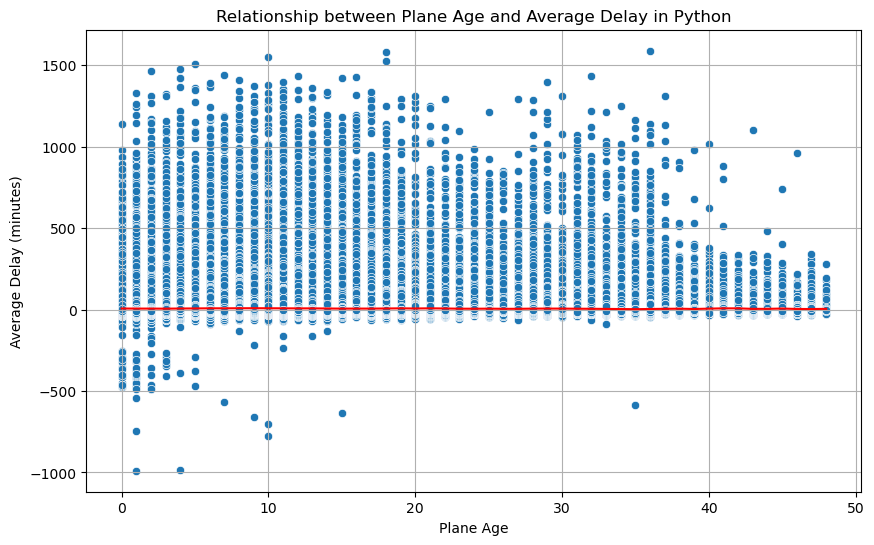

In [4]:
# Calculate the trend line using Pandas
trend_line = merged_data.groupby('PlaneAge')['AverageDelay'].mean().reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='PlaneAge', y='AverageDelay')
plt.xlabel('Plane Age')
plt.ylabel('Average Delay (minutes)')
plt.title('Relationship between Plane Age and Average Delay in Python')
plt.grid(True)

# Overlay the trend line
sns.lineplot(data=trend_line, x='PlaneAge', y='AverageDelay', color='red')

plt.show()


In [3]:
# Remove rows with NaN values in 'PlaneAge' or 'AverageDelay'
merged_data = merged_data.dropna(subset=['PlaneAge', 'AverageDelay'])

# Also ensure there are no infinite values by filtering them out
merged_data = merged_data[(~np.isinf(merged_data['PlaneAge'])) & (~np.isinf(merged_data['AverageDelay']))]

# Now that the data is clean, calculate the Pearson correlation coefficient
correlation_coefficient = pearsonr(merged_data['PlaneAge'], merged_data['AverageDelay'])[0]

print(f"Pearson correlation coefficient: {correlation_coefficient}")


Pearson correlation coefficient: -0.00603591806031737
